In [1]:
#### Introduction to Data Wrangling with Pandas ####
## Page 6 ##

In [2]:
#### Recap - Exercise our learning ####

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
#so that we can view the graphs inside the notebook

In [4]:
df = pd.read_csv('~/diamonds-data/diamonds.csv', index_col='Unnamed: 0')

In [5]:
len(df)

598024

In [6]:
df.columns

Index([u'carat', u'cut', u'color', u'clarity', u'table', u'depth', u'cert',
       u'measurements', u'price', u'x', u'y', u'z'],
      dtype='object')

In [7]:
df.head() # filter operation

,carat,cut,color,clarity,table,depth,cert,measurements,price,x,y,z
1,0.25,V.Good,K,I1,59.0,63.7,GIA,3.96 x 3.95 x 2.52,NaN,3.96,3.95,2.52
2,0.23,Good,G,I1,61.0,58.1,GIA,4.00 x 4.05 x 2.30,NaN,4.00,4.05,2.30
3,0.34,Good,J,I2,58.0,58.7,GIA,4.56 x 4.53 x 2.67,NaN,4.56,4.53,2.67
4,0.21,V.Good,D,I1,60.0,60.6,GIA,3.80 x 3.82 x 2.31,NaN,3.80,3.82,2.31
5,0.31,V.Good,K,I1,59.0,62.2,EGL,4.35 x 4.26 x 2.68,NaN,4.35,4.26,2.68


In [8]:
df.tail() #filter operation

,carat,cut,color,clarity,table,depth,cert,measurements,price,x,y,z
598020,3.02,Ideal,E,VVS2,58.0,59.8,HRD,9.43 x 9.51 x 5.66,99930.0,9.43,9.51,5.66
598021,5.01,V.Good,I,VVS2,63.5,61.5,IGI,10.78 x 10.89 x 6.68,99942.0,10.78,10.89,6.68
598022,3.43,Ideal,F,VS2,54.0,62.7,GIA,9.66 x 9.61 x 6.05,99960.0,9.66,9.61,6.05
598023,3.01,V.Good,E,VS1,58.0,62.9,GIA,9.15 x 9.19 x 5.77,99966.0,9.15,9.19,5.77
598024,4.13,Ideal,H,IF,56.0,62.5,IGI,10.27 x 10.19 x 6.4,99990.0,10.27,10.19,6.40


In [9]:
len_old = len(df)

In [10]:
df = df.dropna(how='any') # another form of filter operation

In [11]:
"""
No. of rows with atleast one NA value
"""
len_old - len(df)

4240

In [12]:
df.describe()

,carat,table,depth,price,x,y,z
count,593784.000000,593784.000000,593784.000000,593784.000000,593784.000000,593784.000000,593784.000000
mean,1.072593,57.658755,61.091980,8755.808723,5.991952,6.200535,4.036075
std,0.813113,4.827985,7.487465,13022.108651,1.530444,1.485081,1.240932
min,0.200000,0.000000,0.000000,300.000000,0.150000,1.000000,0.040000
25%,0.500000,56.000000,61.000000,1218.000000,4.740000,4.970000,3.120000
50%,0.900000,58.000000,62.000000,3503.000000,5.780000,6.050000,3.860000
75%,1.500000,59.000000,62.700000,11186.000000,6.970000,7.230000,4.610000
max,9.250000,75.900000,81.300000,99990.000000,13.890000,13.890000,13.180000


In [13]:
non_numeric = ['clarity', 'cut', 'color', 'cert'] #catgorical values-ordered

In [14]:
for name in non_numeric:
    print(name, df[name].unique())

('clarity', array(['SI1', 'SI2', 'VS2', 'I1', 'VVS2', 'VS1', 'VVS1', 'I2', 'IF'], dtype=object))
('cut', array(['V.Good', 'Good', 'Ideal'], dtype=object))
('color', array(['G', 'K', 'J', 'H', 'F', 'I', 'D', 'E', 'L'], dtype=object))
('cert', array(['GIA', 'IGI', 'EGL USA', 'EGL', 'EGL Intl.', 'AGS', 'OTHER', 'HRD',
       'EGL ISRAEL'], dtype=object))


In [17]:
df.groupby('color').count()

,carat,cut,clarity,table,depth,cert,measurements,price,x,y,z
color,,,,,,,,,,,
D,73201,73201,73201,73201,73201,73201,73201,73201,73201,73201,73201
E,92859,92859,92859,92859,92859,92859,92859,92859,92859,92859,92859
F,92772,92772,92772,92772,92772,92772,92772,92772,92772,92772,92772
G,95363,95363,95363,95363,95363,95363,95363,95363,95363,95363,95363
H,85951,85951,85951,85951,85951,85951,85951,85951,85951,85951,85951
I,69879,69879,69879,69879,69879,69879,69879,69879,69879,69879,69879
J,48478,48478,48478,48478,48478,48478,48478,48478,48478,48478,48478
K,25660,25660,25660,25660,25660,25660,25660,25660,25660,25660,25660
L,9621,9621,9621,9621,9621,9621,9621,9621,9621,9621,9621


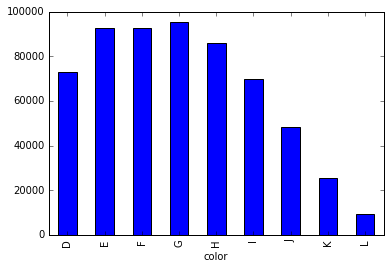

In [19]:
df.groupby('color')['carat'].count().plot(kind='bar')

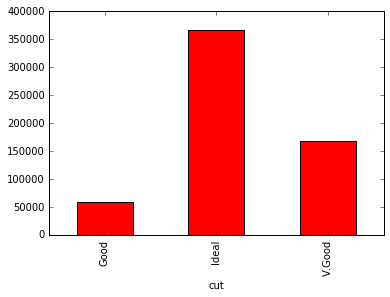

In [20]:
df.groupby('cut')['carat'].count().plot(kind='bar', color='red')

In [21]:
df.corr()

,carat,table,depth,price,x,y,z
carat,1.000000,0.037631,0.008883,0.856340,0.859864,0.960857,0.791658
table,0.037631,1.000000,0.423914,0.023266,0.028462,0.045617,0.031170
depth,0.008883,0.423914,1.000000,-0.002129,-0.003632,0.007346,0.031961
price,0.856340,0.023266,-0.002129,1.000000,0.719537,0.796746,0.645191
x,0.859864,0.028462,-0.003632,0.719537,1.000000,0.893783,0.482109
y,0.960857,0.045617,0.007346,0.796746,0.893783,1.000000,0.819880
z,0.791658,0.031170,0.031961,0.645191,0.482109,0.819880,1.000000


In [22]:
df.corr()>0.7

,carat,table,depth,price,x,y,z
carat,True,False,False,True,True,True,True
table,False,True,False,False,False,False,False
depth,False,False,True,False,False,False,False
price,True,False,False,True,True,True,False
x,True,False,False,True,True,True,False
y,True,False,False,True,True,True,True
z,True,False,False,False,False,True,True


In [23]:
df_subset = df.loc[:, ['carat', 'x', 'y', 'price']] #subset-slice-by-label index

In [24]:
df_subset = df[['carat', 'x', 'y', 'price']] #subset-slice-by-column name

In [25]:
df_subset = df.iloc[:, [0, 8, 9, 10]] #subset-slice-by-numeric index

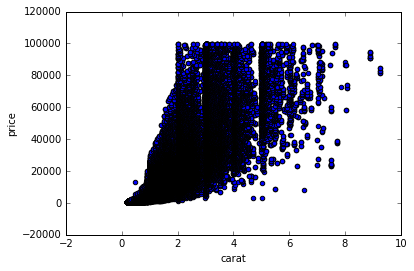

In [26]:
df_subset.plot.scatter(x='carat', y='price')

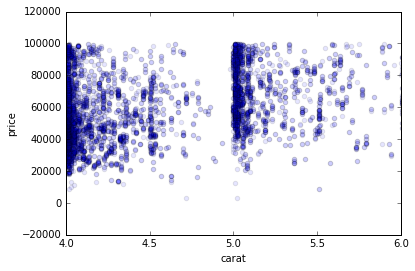

In [27]:
df.plot.scatter(x='carat', y='price', alpha=0.1, xlim=(4,6))

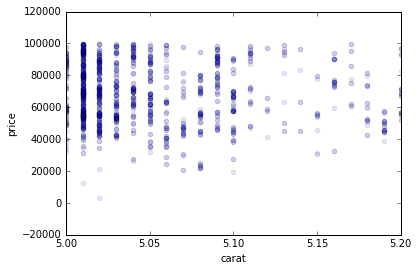

In [28]:
df.plot.scatter(x='carat', y='price', alpha=0.1, xlim=(5,5.2))